<br><br>
<font size = '6'><b>Kalman Filter</b></font>

<a href="./reference_files/Understanding the Basis of the Kalman Filter.pdf" target="_blank">Understanding the Basis of the Kalman Filter</a>

<table style="border-style: hidden; border-collapse: collapse;" width = "90%"> 
    <tr style="border-style: hidden; border-collapse: collapse;">
        <td width = 60% style="border-style: hidden; border-collapse: collapse;">
             
        </td>
        <td width = 30%>
        Collected by Prof. Seungchul Lee<br>
        iSystems<br>http://isystems.unist.ac.kr/<br>
        UNIST
        </td>
    </tr>
</table>

Table of Contents
<div id="toc"></div>



# 1. Low-pass Filter in Time

## 1.1. Average Filter

Given $k-1$ data points: $x_1,x_2,\cdots,x_{k-1}$

$$\bar{x}_{k-1} = \frac{x_1 + x_2 + \cdots +x_{k-1}}{k-1}$$

New data $x_k$ comes in

$$\bar{x}_{k} = \frac{x_1 + x_2 + \cdots +x_{k-1} + x_k}{k}$$

Recursive

$$
\begin{align*}
\bar{x}_{k} &= \frac{k-1}{k} \bar{x}_{k-1} + \frac{1}{k} x_k \\
& = \alpha \bar{x}_{k-1} + (1-\alpha) {x}_{k}, \qquad \alpha = \frac{k-1}{k}
\end{align*}
$$

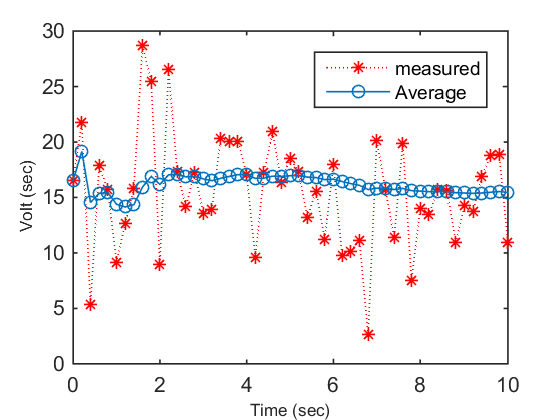

In [1]:
dt = 0.2;
t = 0:dt:10;

m = length(t);
x = 14.4 + 4*randn(m,1);

avg = [];
preAvg = 0;

for k = 1:m
    alpha = (k-1)/k;
    avg(k) = alpha*preAvg + (1-alpha)*x(k);
    preAvg = avg(k);
end

plot(t,x,'r:*')
hold on
plot(t, avg, 'o-')
hold off

legend('measured','Average')
xlabel('Time (sec)','fontsize',8)
ylabel('Volt (sec)','fontsize',8)

## 1.2. Moving Average Filter

Only use the latest $n$ data points

$$
\begin{align*}
\bar{x}_{k} &= \frac{x_{k-n+1} + x_{k-n+2} + \cdots +x_{k}}{n} \\
\bar{x}_{k-1} &= \frac{x_{k-n} + x_{k-n+1} + \cdots +x_{k-1}}{n}
\end{align*}
$$

$$\bar{x}_{k} - \bar{x}_{k-1} = \frac{x_{k-n+1} + x_{k-n+2} + \cdots +x_{k}}{n} - \frac{x_{k-n} + x_{k-n+1} + \cdots +x_{k-1}}{n} = \frac{x_k - x_{k-n}}{n}$$

$$\bar{x}_{k} = \bar{x}_{k-1} + \frac{x_k - x_{k-n}}{n}$$




with $n = 30$

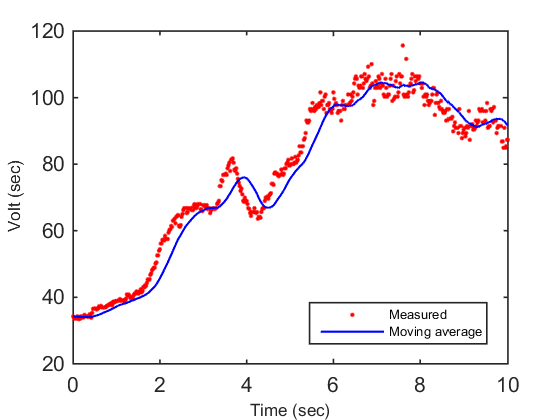

In [10]:
load data_files/SonarAlt
X = sonarAlt;
m = length(X);

%% Coded for real-time data steaming

n = 30;     % window size

XHAT   = [];
Xsaved  = [];

xbuf = [];
preAvg = 0;

for k = 1:m
    
    xm = X(k);
    
    if k == 1
        xbuf = xm*ones(n+1,1);
        preAvg = xm;
    end
    
    for i = 1:n
        xbuf(i) = xbuf(i+1);
    end
    
    xbuf(n+1) = xm;
    
    xhat = preAvg + (xm - xbuf(1))/n;
    preAvg = xhat;

    XHAT(k)  = xhat;
    Xsaved(k) = xm;
end

%% plot
dt = 0.02;
t  = 0:dt:(m-1)*dt;

plot(t, X, 'r.');   hold on
plot(t, XHAT, 'b','linewidth',1);   hold off
xlim([0,10]);
leg = legend('Measured', 'Moving average');
set(leg,'fontsize',6,'location','southeast')
xlabel('Time (sec)','fontsize',8)
ylabel('Volt (sec)','fontsize',8)

with $n = 10$

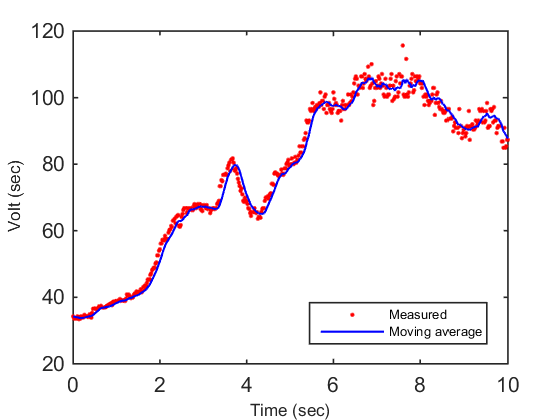

In [12]:
load data_files/SonarAlt
X = sonarAlt;
m = length(X);

%% it is coded as if data is real-time streamed

n = 10;     % window size

XHAT   = [];
Xsaved  = [];

xbuf = [];
preAvg = 0;

for k = 1:m
    
    xm = X(k);
    
    if k == 1
        xbuf = xm*ones(n+1,1);
        preAvg = xm;
    end
    
    for i = 1:n
        xbuf(i) = xbuf(i+1);
    end
    
    xbuf(n+1) = xm;
    
    xhat = preAvg + (xm - xbuf(1))/n;
    preAvg = xhat;

    XHAT(k)  = xhat;
    Xsaved(k) = xm;
end

%% plot
dt = 0.02;
t  = 0:dt:(m-1)*dt;

plot(t, X, 'r.');   hold on
plot(t, XHAT, 'b','linewidth',1);   hold off
xlim([0,10]);
leg = legend('Measured', 'Moving average');
set(leg,'fontsize',6,'location','southeast')
xlabel('Time (sec)','fontsize',8)
ylabel('Volt (sec)','fontsize',8)

## 1.3. Exponentially Weighted Average Filter

<br>
$$
\begin{align*}
\bar{x}_k &= \alpha \bar{x}_{k-1} + (1-\alpha) {x}_{k} \\
&= \alpha (\alpha \bar{x}_{k-2} + (1-\alpha) {x}_{k-1}) + (1-\alpha) {x}_{k} \\
&= \alpha^2 \bar{x}_{k-2} + \alpha (1-\alpha) {x}_{k-1} + (1-\alpha) {x}_{k} \\
&\;\vdots\\
&= (1-\alpha)(1 x_k + \alpha x_{k-1} + \alpha^2 x_{k-2} + \cdots)
\end{align*}
$$

$$
$$

with $\alpha = 0.9$

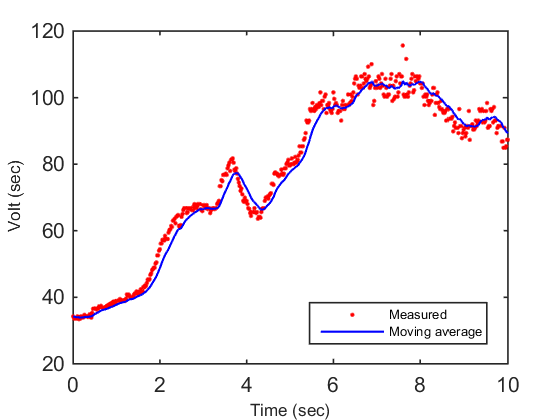

In [13]:
load data_files/SonarAlt
X = sonarAlt;
m = length(X);

%% it is coded as if data is real-time streamed

XHAT = [];
Xsaved = [];

prevX = 0;
alpha = 0.9;

for k = 1:m
    
  xm = X(k);
  
  if k == 1
      prevX = xm;
  end
  
  xhat  = alpha*prevX + (1 - alpha)*xm;
  prevX = xhat;
  
  XHAT(k)  = xhat;
  Xsaved(k) = xm;
end


%% plot
dt = 0.02;
t  = 0:dt:(m-1)*dt;

plot(t, X, 'r.');   hold on
plot(t, XHAT, 'b','linewidth',1);   hold off
xlim([0,10]);
leg = legend('Measured', 'Moving average');
set(leg,'fontsize',6,'location','southeast')
xlabel('Time (sec)','fontsize',8)
ylabel('Volt (sec)','fontsize',8)

with $\alpha = 0.1$

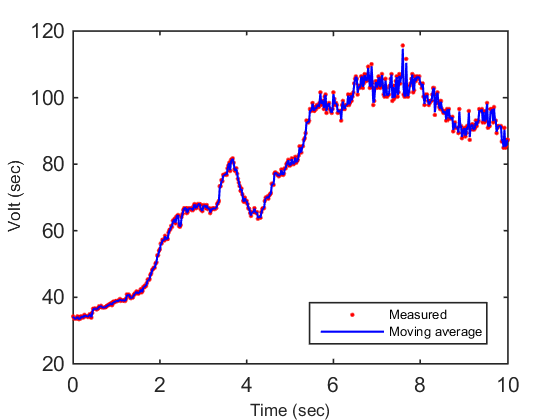

In [15]:
load data_files/SonarAlt
X = sonarAlt;
m = length(X);

%% it is coded as if data is real-time streamed

XHAT = [];
Xsaved = [];

prevX = 0;
alpha = 0.1;

for k = 1:m
    
  xm = X(k);
  
  if k == 1
      prevX = xm;
  end
  
  xhat  = alpha*prevX + (1 - alpha)*xm;
  prevX = xhat;
  
  XHAT(k)  = xhat;
  Xsaved(k) = xm;
end


%% plot
dt = 0.02;
t  = 0:dt:(m-1)*dt;

plot(t, X, 'r.');   hold on
plot(t, XHAT, 'b','linewidth',1);   hold off
xlim([0,10]);
leg = legend('Measured', 'Moving average');
set(leg,'fontsize',6,'location','southeast')
xlabel('Time (sec)','fontsize',8)
ylabel('Volt (sec)','fontsize',8)

# 2. Sensor Fusion (two measured observations)

## 2.1. Estimate true location with two GPSs

<table style="border-style: hidden; border-collapse: collapse;" width = "96%"> 
    <tr style="border-style: hidden; border-collapse: collapse;">
        <td width = 48% style="border-style: hidden; border-collapse: collapse;">
<img src = "./image_files/twoGPS.png" width=300>
        </td>
        <td width = 48%>
<img src = "./image_files/GraphicalGPS.png" width=300>
        </td>
    </tr>
</table>


- What is your educated guess of the location?
    - Maybe somewhere between $y_a$ and $y_b$


- What if we know that two GPSs are identical (i.e., the same accuracy or uncertainty)

<table style="border-style: hidden; border-collapse: collapse;" width = "80%"> 
    <tr style="border-style: hidden; border-collapse: collapse;">
        <td width = 48% style="border-style: hidden; border-collapse: collapse;">
$$ \hat{x} = \frac{1}{2} y_A + \frac{1}{2} y_B $$
        </td>
        <td width = 48%>
<img src = "./image_files/GPS_identical.png" width=300>
        </td>
    </tr>
</table>


- What if we know that GPS A is more accurate (or less uncertain) than GPS B?

<table style="border-style: hidden; border-collapse: collapse;" width = "80%"> 
    <tr style="border-style: hidden; border-collapse: collapse;">
        <td width = 48% style="border-style: hidden; border-collapse: collapse;">
<center>more towards $y_A$</center>
        </td>
        <td width = 48%>
<img src = "./image_files/GPS_diff.png" width=300>
        </td>
    </tr>
</table>

## 2.2. Sensor Fusion in 1D

Assumptions
- follows Gaussian distribution
- variances of two GPSs

$$\text{var}(y_A) = \sigma_A^2\\
\text{var}(y_B) = \sigma_B^2$$

Optimal position estimation $\hat x$

$$
\begin{align*}
E[\hat x] &= \frac{\frac{1}{\sigma_A^2} y_A + \frac{1}{\sigma_B^2}y_B}{\frac{1}{\sigma_A^2} + \frac{1}{\sigma_B^2}}\\
\text{var}[\hat x] &= \frac{1}{\sigma_A^2} + \frac{1}{\sigma_B^2} < \sigma_A^2, \;\sigma_B^2 \qquad \text{more accurate}
\end{align*}
$$

<table style="border-style: hidden; border-collapse: collapse;" width = "96%"> 
    <tr style="border-style: hidden; border-collapse: collapse;">
        <td width = 48% style="border-style: hidden; border-collapse: collapse;">
<img src = "./image_files/dist_ident.png" width=300>
        </td>
        <td width = 48%>
<img src = "./image_files/dist_diff.png" width=300>
        </td>
    </tr>
</table>

## 2.3. Sensor Fusion in 2D

<img src = "./image_files/fusion_2D.png" width=300>

## 2.4. Different Perspective

- Observe GPS A first $\;y_A, \; \sigma_A^2$

$$
\begin{align*}
\hat x_1 &= y_A\\
\hat{\sigma}_{1}^2 &= \sigma_A^2
\end{align*}
$$

- Combine GPS B obervation $\;y_B, \; \sigma_B^2$

$$E[\hat x] = \frac{\frac{1}{\sigma_A^2} y_A + \frac{1}{\sigma_B^2}y_B}{\frac{1}{\sigma_A^2} + \frac{1}{\sigma_B^2}} \quad \text{and   set } K =  \frac{\frac{1}{\sigma_B^2}}{\frac{1}{\sigma_A^2} + \frac{1}{\sigma_B^2}}$$

$$
\begin{align*}
\hat{x}_2 = E[\hat x] &= (1-K) y_A + K y_B\\
&= (1-K) \hat x_1  + K y_B\\
&= \hat x_1 + K (y_B - \hat x_1 )
\end{align*}
$$

- Optimal estimation
    - prediction first, then correct or update with prediction error
    
$$\underbrace{\hat x_2}_{\text{final estimation}} = \underbrace{\hat x_1}_{\text{prediction}} + K ( \overbrace{ \underbrace{y_B}_{\text{measured}} - \hat x_1}^{\text{prediction error}})$$    

# 3. Kalman Filter

References:
- <a href="./reference_files/BayesianFilteringFromKalmanFilters.pdf" target="_blank">Bayesian filtering: From Kalman filters to particle filters, and beyond</a> by Zhe Chen

- <a href="./reference_files/System and Measurement Models.pdf" target="_blank">System and Measurement Models</a> by Dan Lee

- <a href="./reference_files/Maximum-A-Posterior Estimation.pdf" target="_blank">Maximum-A-Posterior Estimation</a> by Dan Lee


Discrete linear dynamical system of motion

$$
\begin{align*}
x_{t+1} &= A x_t + B u_t\\
z_t &=  C x_t
\end{align*}
$$


## 3.1. Bayesian Modeling
Kalman filter has a very nice Bayesian interpretation.


- Prediction using state dynamics model
$$p(x_{t} \mid x_{t-1})$$


- inference from noisy measurements
$$p(z_t \mid x_t)$$


- Model $x_t$ with a Gaussian (mean and covariance)
$$p(x_t) = \mathcal{N}(x_t, \Sigma_t)$$

## 3.2. Bayesian Filtering

<img src = "./image_files/KF2.png" width=400>


- Apply linear dynamics
$$
\begin{align*}
p(x_{t} \mid x_{t-1}) &= A p(x_{t-1})\\
p(z_t \mid x_t) &= Cp(x_t)
\end{align*}
$$


- Add noise for motion and observations
$$
\begin{align*}
p(x_{t} \mid x_{t-1}) &= A p(x_{t-1}) + \omega\\
p(z_t \mid x_t) &= Cp(x_t) + \gamma
\end{align*}
$$


- Introduce a Gaussian model of $x_t$
$$
\begin{align*}
p(x_{t} \mid x_{t-1}) &= A \mathcal{N}(x_{t-1},\Sigma_{t-1}) + \mathcal{N}(0, \Sigma_{\omega}) \\
p(z_t \mid x_t) &= C \mathcal{N}(x_t,\Sigma_t) + \mathcal{N}(0,\Sigma_{\gamma})
\end{align*}
$$


- Apply linear transform to Gaussian distributions
$$
\begin{align*}
p(x_{t} \mid x_{t-1}) &= \mathcal{N}(Ax_{t-1},A\Sigma_{t-1} A^T) + \mathcal{N}(0, \Sigma_{\omega}) \\
p(z_t \mid x_t) &= \mathcal{N}(Cx_t,C\Sigma_t C^T) + \mathcal{N}(0,\Sigma_{\gamma})
\end{align*}
$$


- Apply summation
$$
\begin{align*}
p(x_{t} \mid x_{t-1}) &= \mathcal{N}(Ax_{t-1},A\Sigma_{t-1} A^T + \Sigma_{\omega}) =\mathcal{N}(Ax_{t-1},P)\\
p(z_t \mid x_t) &= \mathcal{N}(Cx_t,C\Sigma_t C^T + \Sigma_{\gamma}) = \mathcal{N}(Cx_t,R)
\end{align*}
$$

## 3.3. Bayesian Kalman Filtering

- Bayes' Rule

$$
\begin{align*}
p(A \mid B) &= \frac{p(B \mid A) \;\;p(A)}{p(B)} \\
p(A \mid B,C) &= \frac{p(B \mid A,C) \;\;p(A \mid C)}{p(B \mid C)}\\
& \;\vdots\\
p(x \mid z_1,\cdots,z_t) &= \frac{p(z_t \mid x,z_1,\cdots,z_{t-1}) \;\;p(x \mid z_1,\cdots,z_{t-1})}{p(z_t \mid z_1,\cdots,z_{t-1})}
\end{align*}
$$


- Given from Kalman model

$$
\begin{align*}
p(x_{t} \mid x_{t-1}) &= \mathcal{N}(Ax_{t-1},A\Sigma_{t-1} A^T + \Sigma_{\omega}) =\mathcal{N}(Ax_{t-1},P)& \text{prior}\\
p(z_t \mid x_t) &= \mathcal{N}(Cx_t,C\Sigma_t C^T + \Sigma_{\gamma}) =\mathcal{N}(Cx_t,R)& \text{likelihood} \\ \\
p(x_t \mid z_t, x_{t-1}) &= \frac{p(z_t \mid x_t, x_{t-1}) p( x_t \mid x_{t-1})}{p(z_t \mid z_{t-1})} = \frac{p(z_t \mid x_t) p( x_t \mid x_{t-1})}{p(z_t \mid z_{t-1})}& \text{posterior}
\end{align*}
$$

- Simplify with substitutions

$$
\begin{align*}
P &= A\Sigma_{t-1} A^T + \Sigma_{\omega}\\
R &= C\Sigma_t C^T + \Sigma_{\gamma}
\end{align*}
$$

- Posterior distribution is another Gaussian


- MAP estimates "optional" $\hat{x}_t$


- Use MAP estimates to form new mean and variance for the state


$$
\begin{align*}
\hat{x}_t &= \arg \max_{x_t} p(x_t \mid z_t, x_{t-1})\\
& = \arg \max_{x_t} p(z_t \mid x_t) p( x_t \mid x_{t-1}) \\
& = \arg \max_{x_t} \mathcal{N}(Cx_t,R) \mathcal{N}(Ax_{t-1},P) \\
\end{align*}
$$

- Simplify the exponential form via logarithms

$$
\begin{align*}
\hat{x}_t &= \arg \min_{x_t} \;(z_t - Cx_t)^TR^{-1}(z_t - Cx_t) + (x_t - Ax_{t-1})^TP^{-1}(x_t - Ax_{t-1})\\
0 &= \frac{d}{dx_t}\left( (z_t - Cx_t)^TR^{-1}(z_t - Cx_t) + (x_t - Ax_{t-1})^TP^{-1}(x_t - Ax_{t-1})\right)
\end{align*}
$$

- Collect terms in the derivative

$$
\begin{align*}
(C^T R^{-1}C + P^{-1})x_t &= C^T R^{-1}z_t + P^{-1}A x_{t-1}\\
x_t &= (C^T R^{-1}C + P^{-1})^{-1} (C^T R^{-1}z_t + P^{-1}A x_{t-1})
\end{align*}
$$

- Apply the matrix inversion lemma

$$(C^T R^{-1}C + P^{-1})^{-1} = P - \underbrace{PC^T(R+CPC^T)^{-1}}_{K}CP$$

- Define Kalman Gain $K$

$$K=PC^T(R+CPC^T)^{-1}$$


- Expand the terms

$$
\begin{align*}
\hat{x}_t &= (C^T R^{-1}C + P^{-1})^{-1} (C^T R^{-1}z_t + P^{-1}A x_{t-1}) \\
&= (P-KCP)(C^T R^{-1}z_t + P^{-1}A x_{t-1}) \\
&= Ax_{t-1} + PC^T R^{-1}z_t - KCAx_{t-1} - KCPC^T R^{-1}z_t \\
&= Ax_{t-1} - KCAx_{t-1} + (PC^T R^{-1} - KCPC^T R^{-1})z_t \\
&= Ax_{t-1} - KCAx_{t-1} + Kz_t \qquad (\because \;K = PC^T R^{-1} - KCPC^T R^{-1})\\ \\
\hat{x}_t &= Ax_{t-1} + K(z_t - CAx_{t-1})
\end{align*}
$$

- Update the covariance of the state

$$\hat{P}_t = P - KCP=(I-KC)P$$

## 3.4. Summary of Kalman Filter

- Prediction 

$$
\begin{align*}
\tilde{x}_{t} &= A\hat{x}_{t-1} \\
\tilde{P}_{t} &= A\hat{P}_{t-1} A^T + \Sigma_{\omega}
\end{align*}
$$

- Correction

$$
\begin{align*}
K &= \tilde{P}C^T(R+C\tilde{P}C^T)^{-1}\\
\hat{x}_t &= \tilde{x}_{t} + K(z_t - C\tilde{x}_{t}) \\
\hat{P}_t &=(I-KC)\tilde{P}_{t}
\end{align*}
$$

# 4. Different View

Most other materials use different notations to explain the <a href="./reference_files/kalman_filter.pdf" target="_blank">Kalman filter</a> (by S. Lall). 

$$
\begin{align*}
{x}_{t \mid s} &\sim \mathcal{N}(x_t \mid z_0, \cdots, z_s) \\ \\
\hat{x}_{t \mid s} &= \mathbf{E} (x_t \mid z_0, \cdots, z_s) \\
\Sigma_{t \mid s} &= \text{cov} (x_t \mid z_0, \cdots, z_s)
\end{align*}
$$


## 4.1. Bayesian formualtion and multivariate Gaussian statistics

<a href="./reference_files/Understanding of the Kalman Filter.pdf" target="_blank">Understanding of the Kalman Filter</a>

Suppose $x \sim N(\mu, \Sigma)$, and

$$ x = \begin{bmatrix} x_1 \\ x_2 \end{bmatrix} \quad \mu = \begin{bmatrix} \mu_1 \\ \mu_2 \end{bmatrix} \quad \Sigma = \begin{bmatrix} \Sigma_{11} & \Sigma_{12} \\ \Sigma_{21} & \Sigma_{22} \end{bmatrix}  $$

Then the conditional pdf of $x_1$ given $x_2 = y$ is Gaussian

$$(x_1 \mid x_2 = y) = \mathcal{N}\left( \mu_1 + \Sigma_{12} \Sigma^{-1}_{22} \,(y-\mu_2),\; \Sigma_{11} - \Sigma_{12}\Sigma^{-1}_{22}\Sigma_{21} \right)$$

<br>
Look at the Kalman filter via conditional probability of Gaussian distributions, given a linear system

$$
\begin{align*}
x_{t\mid t-1} &= A x_{t-1\mid t-1} + \upsilon\\
z_t &=  C x_{t\mid t-1} + \omega
\end{align*}
$$

- Time update
$$
x_{t\mid t-1} = A x_{t-1\mid t-1} + \upsilon \implies (x_{t \mid t-1} \mid x_{t-1\mid t-1}) \sim \mathcal{N} \left(A\hat{x}_{t-1 \mid t-1} \;,\; A\Sigma_{t-1 \mid t-1} A^T + V\right)
$$

<br><br>
- Measurement update

$$z_t =  C x_{t\mid t-1} + \omega \implies \begin{bmatrix} x_{t\mid t-1} \\ z_t\end{bmatrix} = \begin{bmatrix} I & 0 \\ C &I\end{bmatrix} \begin{bmatrix} x_{t\mid t-1} \\ \omega\end{bmatrix} \sim \mathcal{N} \left(\begin{bmatrix} \hat{x}_{t\mid t-1}\\ C\hat{x}_{t\mid t-1}\end{bmatrix} , \begin{bmatrix} \Sigma_{t\mid t-1} & \Sigma_{t\mid t-1} C^T\\ C \Sigma_{t\mid t-1} & C\Sigma_{t\mid t-1} C^T + \Sigma_{\omega}\end{bmatrix}\right)$$

$$
\begin{align*}
(x_{t\mid t} \mid z = z_t) &\sim \mathcal{N} \left(\hat{x}_{t\mid t-1}  + \Sigma_{t\mid t-1} C^T \left(  C\Sigma_{t\mid t-1} C^T + \Sigma_{\omega}\right)^{-1} \, (z_t - C\hat{x}_{t\mid t-1}) \;,\; \Sigma_{t\mid t-1} -   \Sigma_{t\mid t-1} C^T \left(  C\Sigma_{t\mid t-1} C^T + \Sigma_{\omega}\right)^{-1} C \Sigma_{t\mid t-1}\right) \\
&\sim \mathcal{N} \left(\hat{x}_{t\mid t-1} + K(z_t - C\hat{x}_{t\mid t-1}) \;,\; (I-KC)\Sigma_{t\mid t-1}\right)\quad \text{where }K = \Sigma_{t \mid t-1}C^T(\Sigma_{\omega}+C\Sigma_{t \mid t-1}C^T)^{-1}
\end{align*}
$$

## 4.2. Summary

- Prediction (= time update, $\;\hat{x}_{t-1 \mid t-1} \rightarrow \hat{x}_{t \mid t-1}$)

$\quad \;$ We do not have any more data, we just update our earlier posterior of $x_t$ to give a new posterior of $x_{t+1}$<br>
$\quad \;$ We are just propagating the pmf under the linear dynamics


$$
\begin{align*}
\hat{x}_{t \mid t-1} &= A\hat{x}_{t-1 \mid t-1} \\
\Sigma_{t \mid t-1} &= A\Sigma_{t-1 \mid t-1} A^T + V
\end{align*}
$$

- Correction (= measurement update, $\;\hat{x}_{t \mid t-1} \rightarrow \hat{x}_{t \mid t}$)

$\quad \;$ We start with $\hat{x}_{t \mid t-1}$, and use it as the prior for our next measurement of $z_t$

$$
\begin{align*}
K &= \Sigma_{t \mid t-1}C^T(\Sigma_{\omega}+C\Sigma_{t \mid t-1}C^T)^{-1}\\
\hat{x}_{t \mid t} &= \hat{x}_{t\mid t-1} + K(z_t - C\hat{x}_{t\mid t-1}) \\
{\Sigma}_{t\mid t} &=(I-KC)\Sigma_{t\mid t-1}
\end{align*}
$$

In [2]:
%%javascript
$.getScript('https://kmahelona.github.io/ipython_notebook_goodies/ipython_notebook_toc.js')

<IPython.core.display.Javascript object>